# 03 — Load data & inspect adjustment

This notebook loads **unadjusted** vs **adjusted** lakes and overlays:
- split-adjusted prices (…_sa),
- total-return series (close_tr),
- split/dividend events from `refdata/<collection>/`.

Use it to spot-check that the adjusted lake is correct.


## 1. Parameters

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- Configure here ----
COLLECTION = "spx_ndx_combined"     # matches refdata/<collection>/ and data/ticker_lists/<collection>.json
TF         = "day"                  # "day" | "minute"
TICKER     = "NVDA"
START      = "2020-01-01"
END        = "2024-12-31"

# Roots (adjust if you keep lakes elsewhere)
REPO_ROOT  = Path.cwd().parents[0] if (Path.cwd().name == "notebooks") else Path.cwd()
UNADJ_ROOT = REPO_ROOT / "lake"      / TF / COLLECTION
ADJ_ROOT   = REPO_ROOT / "lake_adj"  / TF / (COLLECTION + "_adjusted")
REFDIR     = REPO_ROOT / "refdata" / COLLECTION

print("UNADJ_ROOT:", UNADJ_ROOT)
print("ADJ_ROOT  :", ADJ_ROOT)
print("REFDIR    :", REFDIR)


UNADJ_ROOT: /home/mengren/projects/repo_polygonio/lake/day/spx_ndx_combined
ADJ_ROOT  : /home/mengren/projects/repo_polygonio/lake_adj/day/spx_ndx_combined_adjusted
REFDIR    : /home/mengren/projects/repo_polygonio/refdata/spx_ndx_combined


## 2. Load helpers

In [2]:
from polygon_ingest.lake_io import load_series, load_events

df = load_series(UNADJ_ROOT, ADJ_ROOT, TF, TICKER, START, END)
splits, divs = load_events(REFDIR, TICKER)

In [3]:
df = load_series(UNADJ_ROOT, ADJ_ROOT, TF, "NVDA", "2003-09-01", "2005-12-31")
print(len(df), df["datetime"].min(), "→", df["datetime"].max())
assert not df.empty, "No rows loaded—check paths/TICKER/TF"

583 2003-09-10 04:00:00+00:00 → 2005-12-30 05:00:00+00:00


In [4]:
df

,datetime,ticker,open,high,low,close,volume,open_sa,high_sa,low_sa,close_sa,volume_sa,close_tr
0,2003-09-10 04:00:00+00:00,NVDA,20.150000,20.690001,19.160000,19.320000,11480051,0.167917,0.172417,0.159667,0.161000,1.377606e+09,6.548858
1,2003-09-11 04:00:00+00:00,NVDA,19.580000,20.150000,18.299999,19.070000,21728296,0.163167,0.167917,0.152500,0.158917,2.607396e+09,6.464116
2,2003-09-12 04:00:00+00:00,NVDA,18.910000,19.770000,18.700001,19.350000,9659462,0.157583,0.164750,0.155833,0.161250,1.159135e+09,6.559028
3,2003-09-15 04:00:00+00:00,NVDA,19.510000,19.613001,18.959999,19.030001,4946863,0.162583,0.163442,0.158000,0.158583,5.936236e+08,6.450558
4,2003-09-16 04:00:00+00:00,NVDA,19.070000,19.679001,19.070000,19.620001,5171418,0.158917,0.163992,0.158917,0.163500,6.205702e+08,6.650549
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2005-12-23 05:00:00+00:00,NVDA,37.345001,37.590000,37.099998,37.540001,1784191,0.311208,0.313250,0.309167,0.312833,2.141029e+08,12.724852
579,2005-12-27 05:00:00+00:00,NVDA,37.500000,38.180000,37.380001,37.770000,3052104,0.312500,0.318167,0.311500,0.314750,3.662525e+08,12.802815
580,2005-12-28 05:00:00+00:00,NVDA,37.770000,38.240002,37.529999,38.119999,2185599,0.314750,0.318667,0.312750,0.317667,2.622719e+08,12.921453
581,2005-12-29 05:00:00+00:00,NVDA,38.099998,38.220001,37.110001,37.270000,2576469,0.317500,0.318500,0.309250,0.310583,3.091763e+08,12.633331


## 3. Load data & quick QC

In [5]:
df = load_series(UNADJ_ROOT, ADJ_ROOT, TF, TICKER, START, END)
splits, divs = load_events(REFDIR, TICKER)

print(df.head())
print(df.columns.tolist())
print("Rows:", len(df), "Date range:", df["datetime"].min(), "→", df["datetime"].max())

assert df["datetime"].is_monotonic_increasing, "datetime not sorted!"
assert "close_tr" in df.columns, "Adjusted lake missing close_tr"


                   datetime ticker        open        high         low  \
0 2020-01-02 05:00:00+00:00   NVDA  238.750000  239.910004  236.720001   
1 2020-01-03 05:00:00+00:00   NVDA  235.100006  237.830002  234.100006   
2 2020-01-06 05:00:00+00:00   NVDA  232.320007  237.270004  231.270004   
3 2020-01-07 05:00:00+00:00   NVDA  238.199997  241.770004  236.389999   
4 2020-01-08 05:00:00+00:00   NVDA  239.759995  242.039993  238.149002   

        close   volume  open_sa  high_sa    low_sa  close_sa    volume_sa  \
0  239.910004  5893393  5.96875  5.99775  5.918000   5.99775  235735720.0   
1  236.070007  5140601  5.87750  5.94575  5.852500   5.90175  205624040.0   
2  237.059998  6567397  5.80800  5.93175  5.781750   5.92650  262695880.0   
3  239.929993  7965116  5.95500  6.04425  5.909750   5.99825  318604640.0   
4  240.380005  6916929  5.99400  6.05100  5.953725   6.00950  276677160.0   

   close_tr  
0  6.677049  
1  6.570176  
2  6.597729  
3  6.677606  
4  6.690130  
['dateti

## 4. Normalize & plot

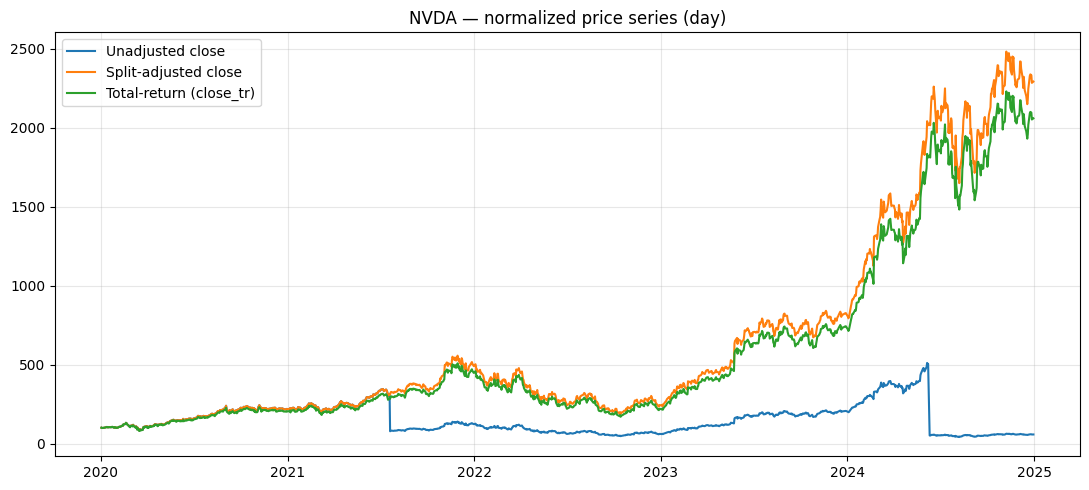

In [6]:
# Normalize to 100 at the first point for easy visual comparison
def norm(s: pd.Series) -> pd.Series:
    s = s.astype("float64")
    return 100 * s / s.iloc[0] if len(s) else s

plot_cols = {
    "close":   "Unadjusted close",
    "close_sa":"Split-adjusted close",
    "close_tr":"Total-return (close_tr)"
}
dfp = df[["datetime"] + list(plot_cols.keys())].dropna(subset=["close"]).set_index("datetime")
for c in plot_cols:
    if c not in dfp.columns:
        dfp[c] = np.nan

# For minute data, downsample for quick visuals (optional)
if TF == "minute":
    dfp = dfp.resample("1H").first().dropna(how="all")

plt.figure(figsize=(11,5))
for c, label in plot_cols.items():
    if dfp[c].notna().any():
        plt.plot(dfp.index, norm(dfp[c]), label=label)
plt.title(f"{TICKER} — normalized price series ({TF})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 5. Overlay events

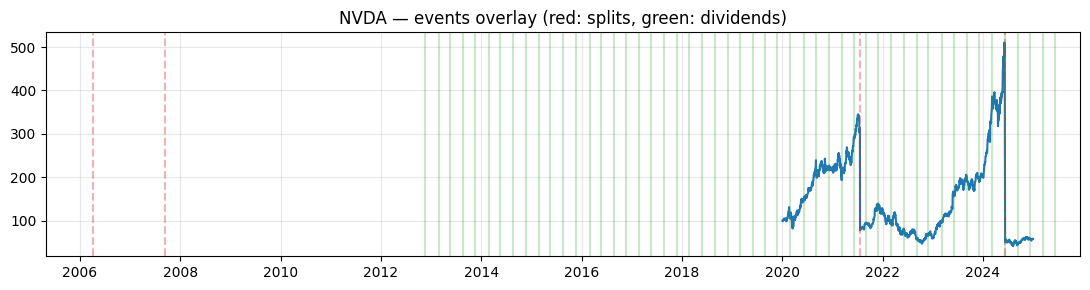

In [7]:
if not splits.empty or not divs.empty:
    plt.figure(figsize=(11,3))
    plt.plot(dfp.index, norm(dfp["close"]), label="Unadjusted close")
    for _, r in splits.iterrows():
        x = r["execution_date"].tz_convert("UTC").tz_localize(None)
        plt.axvline(x=x, color="tab:red", alpha=0.35, linestyle="--")
    for _, r in divs.iterrows():
        x = r["ex_date"].tz_convert("UTC").tz_localize(None)
        plt.axvline(x=x, color="tab:green", alpha=0.25)
    plt.title(f"{TICKER} — events overlay (red: splits, green: dividends)")
    plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()


## 6. Sanity checks (split & TR math)

In [8]:
checks = {}

# Split: close / close_sa should be piecewise-constant between execution dates
if {"close","close_sa"} <= set(df.columns):
    ratio = (df["close"] / df["close_sa"]).replace([np.inf, -np.inf], np.nan)
    steps = ratio.dropna().round(6).diff().abs() > 1e-4
    jumps = int(steps.sum())
    checks["split_piecewise_constant_jumps"] = jumps

# TR: daily returns relation (using close_sa as base)
if {"close_sa","close_tr"} <= set(df.columns):
    d = df.dropna(subset=["close_sa","close_tr"]).copy()
    if len(d) > 2:
        ret_sa = d["close_sa"].pct_change().fillna(0)
        ret_tr = d["close_tr"].pct_change().fillna(0)
        # TR should equal SA returns except on dividend ex-dates where an extra term applies.
        corr = ret_sa.corr(ret_tr)
        checks["corr_ret_sa_vs_tr"] = float(corr)

pd.Series(checks)


split_piecewise_constant_jumps    2.000000
corr_ret_sa_vs_tr                 0.999495
dtype: float64